In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from scipy.stats import zscore
import matplotlib as mpl

# Configure Matplotlib to use LaTeX for text rendering
mpl.rcParams.update({
    # "text.usetex": True,  # Use LaTeX for all text rendering
    "font.family": "serif",  # Use serif font (as LaTeX typically does)
    "font.serif": ["Computer Modern Roman"],  # Default LaTeX font
    "font.size": 12  # Adjust to match your specific needs
})

In [2]:
import pandas as pd

# Load the Excel file
excel_file = '../../data/HGSOC_Zhang_TCGA_CPTAC_OV/1-s2.0-S0092867416306730-mmc5.xlsx'

# Read the names of the sheets in the Excel file
xls = pd.ExcelFile(excel_file)
sheet_names = xls.sheet_names
# Skip the first sheet
sheet_names = sheet_names[1:]
# Initialize an empty DataFrame
merged_df = pd.DataFrame()
for sheet_name in sheet_names:
    # Read each sheet
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    # Assume the first column is 'Proteins' and the second is 'Values'
    df = df.rename(columns={df.columns[0]: 'Proteins', df.columns[1]: sheet_name})
    if merged_df.empty:
        # For the first sheet, initialize the merged DataFrame
        merged_df = df
    else:
        # Merge with the existing DataFrame on 'Proteins'
        merged_df = pd.merge(merged_df, df, on='Proteins', how='outer')
# Replace NaN with 0 (assuming missing values can be treated as 0)
merged_df = merged_df.fillna(0)
# Find the column with the highest value for each protein
merged_df['Highest_Group'] = merged_df.drop('Proteins', axis=1).idxmax(axis=1)
merged_df.head()
print(len(merged_df))
print(merged_df["Highest_Group"].value_counts())
# now use these groups to split proteomics figure. Append as a column 

# Convert the DataFrame to a dictionary mapping proteins to groups
protein_to_group = dict(zip(merged_df['Proteins'], merged_df['Highest_Group']))

prots = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']

# Assign each protein to its group
grouped_proteins = {protein: protein_to_group.get(protein, 'Unknown') for protein in prots}

# If you want to group the proteins by their groups
from collections import defaultdict

grouped = defaultdict(list)
for protein, group in grouped_proteins.items():
    grouped[group].append(protein)

# 'grouped' is now a dictionary with groups as keys and lists of proteins as values
print(dict(grouped))
print(grouped)

1664
WGCNA_metabolism                  375
WGCNA_ECM interaction             325
WGCNA_cytokine signaling          316
WGCNA_DNA replication             249
WGCNA_complement cascade          171
WGCNA_cell-cell communications    142
WGCNA_erythrocyte and platelet     86
Name: Highest_Group, dtype: int64
{'Unknown': ['RAB25', 'NFKB2', 'GOLPH3L', 'YWHAG', 'COX6A1', 'NDUFB3', 'CDKN1B', 'NFKB1', 'ATM', 'NCAPH2', 'ABCB8', 'ATP6V1D', 'GPX4', 'RELA', 'TOP3B', 'RPS6KB2', 'KEAP1', 'MTDH', 'RHOA', 'CASP7', 'CHUK', 'STAT3', 'PECR', 'XIAP', 'CPOX', 'ARNT', 'BIRC2', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN'], 'WGCNA_cell-cell communications': ['BCL2L1', 'TALDO1'], 'WGCNA_metabolism': ['HADH', 'COX7A2', 'COX7C', 'COX6C', 'IDH1', 'PLIN2', 'GLUD1', 'AIFM1', 'PTGES2', 'GPX1', 'ACADSB'], 'WGCNA_ECM interaction': ['TPMT', 'S100A10', 'TGM2', 'CAMK2D', 'FDX1', 'VCAM1', 'IDI1', 'LGALS1'], 'WGCNA_erythrocyte and platelet': ['LTA4H', 'CA2', 'TFRC'], 'WGCNA_cytokine signaling': ['IL4I1', 'ACOT7'], 'WGCNA_comple

In [3]:
cmap = plt.cm.Greys
# Normalize the values to the range [0, 1]
# Assuming your range is from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

# Function to get color from the colormap
def get_color(value):
    try:
        color = cmap(norm(value))
    except:
        color = 'white'
    return color

## Load up base dataframe

In [4]:
main_df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/HGSOC_TCGA_main.csv")
columns  = ['Sample Source','label','Patient Age','Tumor type','Tumor Substage','Proteomic subtype']


for prot in prots: 
    columns.append(prot)
    break

# TODO: organise by pathway group... 
df = main_df[columns]
df['label'] = df['label'].map({1:'Sensitive', 0:'Refractory'})

print(len(df))
df_transposed = df.T

696


/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5283,7094) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
# Define the custom order for the 'Sample Source' column
custom_order = ['FHCRC','Mayo','UAB',"TCGA"]

# Convert the 'Category' column to a categorical type with the specified order
df['Sample Source'] = pd.Categorical(df['Sample Source'], categories=custom_order, ordered=True)
df_sorted = df.sort_values(by=['Sample Source','label','Proteomic subtype']).reset_index(drop=True)

df_transposed = df_sorted.T

# # df_transposed_back = df_transposed.T.sort_values(by=['Sample Source','Tumor type','label','Proteomic subtype'])
# df_transposed_back = df_transposed_back.reset_index(drop=True)
# df_transposed = df_transposed_back.T 

df_transposed.head(10)

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,0,1,2,3,4,5,6,7,8,9,...,686,687,688,689,690,691,692,693,694,695
Sample Source,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,...,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA
label,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,...,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
Patient Age,72.0,64.0,64.0,64.0,61.0,61.0,52,48,52,52,...,57,72,72,72,62,62,62,62,71,71
Tumor type,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Metastatic,Metastatic,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Tumor Substage,IIIA,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIB,IIIC,IIIC,...,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC
Proteomic subtype,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,...,Stromal,Stromal,Stromal,Stromal,NaN,NaN,NaN,NaN,NaN,NaN
RAB25,1.101361,1.101361,1.101361,1.101361,1.245962,1.245962,-0.56504,-0.56504,-0.56504,-0.56504,...,0.936791,-0.919932,-0.919932,-0.919932,-0.633289,-0.633289,-0.633289,-0.633289,1.029757,1.029757


In [6]:
row_to_check = 'Sample Source'

# Find the points where the value changes
values = df_transposed.loc[row_to_check]
# Initialize change_points with False for the first element
change_points = [False] 
# Then start comparing from the second element
change_points += [values[i] != values[i-1] for i in range(1, len(values))]

# Split the DataFrame into segments
segments = []
start_col = 0
for col, changed in enumerate(change_points, start=1):
    if changed or col == len(change_points):
        segments.append(df_transposed.iloc[:, start_col:col-1])
        start_col = col

# Insert three NaN columns between segments
nan_df = pd.DataFrame(np.nan, index=df_transposed.index, columns=['NaN1', 'NaN2', 'NaN3'])
new_segments = [segments[0]]
for segment in segments[1:]:
    new_segments.extend([nan_df, segment])

# Concatenate the segments back into a DataFrame
df_transposed = pd.concat(new_segments, axis=1)

df_transposed_back = df_transposed.T.reset_index(drop=True)
df_transposed = df_transposed_back.T 

In [7]:
df_transposed.head(10)

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
Sample Source,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,...,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA
label,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,...,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
Patient Age,72.0,64.0,64.0,64.0,61.0,61.0,52,48,52,52,...,57,57,72,72,72,62,62,62,62,71
Tumor type,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Metastatic,Metastatic,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Tumor Substage,IIIA,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIB,IIIC,IIIC,...,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC
Proteomic subtype,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,...,Stromal,Stromal,Stromal,Stromal,Stromal,NaN,NaN,NaN,NaN,NaN
RAB25,1.101361,1.101361,1.101361,1.101361,1.245962,1.245962,-0.56504,-0.56504,-0.56504,-0.56504,...,0.936791,0.936791,-0.919932,-0.919932,-0.919932,-0.633289,-0.633289,-0.633289,-0.633289,1.029757


In [8]:
protein_categories = {
				"Drug Metabolism & Biological Oxidation": ["TPMT"],
				"Metabolic": [ "TALDO1",'CA2', "COX7A2", "LGALS1", "S100A10", "ACADSB", "COX6C", "COX7C", 
					"GPX1", "GPX4", "LDHA", "NDUFB3", "ATP6V1D", "ACOT7", "HACL1", 
					"CPOX", "PTGES2", "GLUD1", "COX6A1", "LTA4H", "CASP7", "IL4I1" , "PECR",
					"YWHAG", "IDI1", "AIFM1", "NBN", "HADH", "PLIN2", "FDX1", "NCAPH2", "IDH1", "ABCB8"
				],
				"Hypoxia": [
					"TGM2", "RAB25", "CDKN1B", "EGFR" , "RHOA", "NFKB1", 
					"PDK1", "RPS6KB2", "TFRC", "STAT3", "ARNT", "CAMK2D"
				],
				"NF-kB": [
					"RELA", "ATM", "BCL2L1", "BIRC2", "VCAM1", "NFKB2", "KEAP1", "RIPK1", "MTDH",
					"CHUK", "MYD88", "GOLPH3L", "TOP3B", "XIAP"
				]
			}

num_fixed_rows = 6

# Split the DataFrame into two parts
df_fixed = df_transposed.iloc[:num_fixed_rows]  # The first part that remains unchanged
df_proteins = df_transposed.iloc[num_fixed_rows:]  # The second part with protein rows


# convert columns to numberic
for col in df_proteins.columns:
    if df_proteins[col].dtype == 'object':
        df_proteins[col] = pd.to_numeric(df_proteins[col], errors='coerce')
        
print(df_proteins.dtypes)

print(df_proteins.isna().any())
# Check for infinite values
print(df_proteins.isin([np.inf, -np.inf]).any())


df_proteins = df_proteins.apply(zscore, axis=0)

# Flatten the dictionary to get a list of proteins in the desired order
ordered_proteins = [protein for category in protein_categories.values() for protein in category]

# Filter and reorder the second part of the DataFrame
df_proteins_ordered = df_proteins.loc[df_proteins.index.intersection(ordered_proteins)]



# add nans in between groups. 

# Concatenate the two parts back together
df_transposed = pd.concat([df_fixed, df_proteins_ordered])
df_transposed.head()

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
696    float64
697    float64
698    float64
699    float64
700    float64
Length: 701, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
696    False
697    False
698    False
699    False
700    False
Length: 701, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
696    False
697    False
698    False
699    False
700    False
Length: 701, dtype: bool


/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
Sample Source,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,...,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA
label,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,...,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
Patient Age,72.0,64.0,64.0,64.0,61.0,61.0,52,48,52,52,...,57,57,72,72,72,62,62,62,62,71
Tumor type,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Metastatic,Metastatic,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Tumor Substage,IIIA,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIB,IIIC,IIIC,...,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC


### Plot to show datasets

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


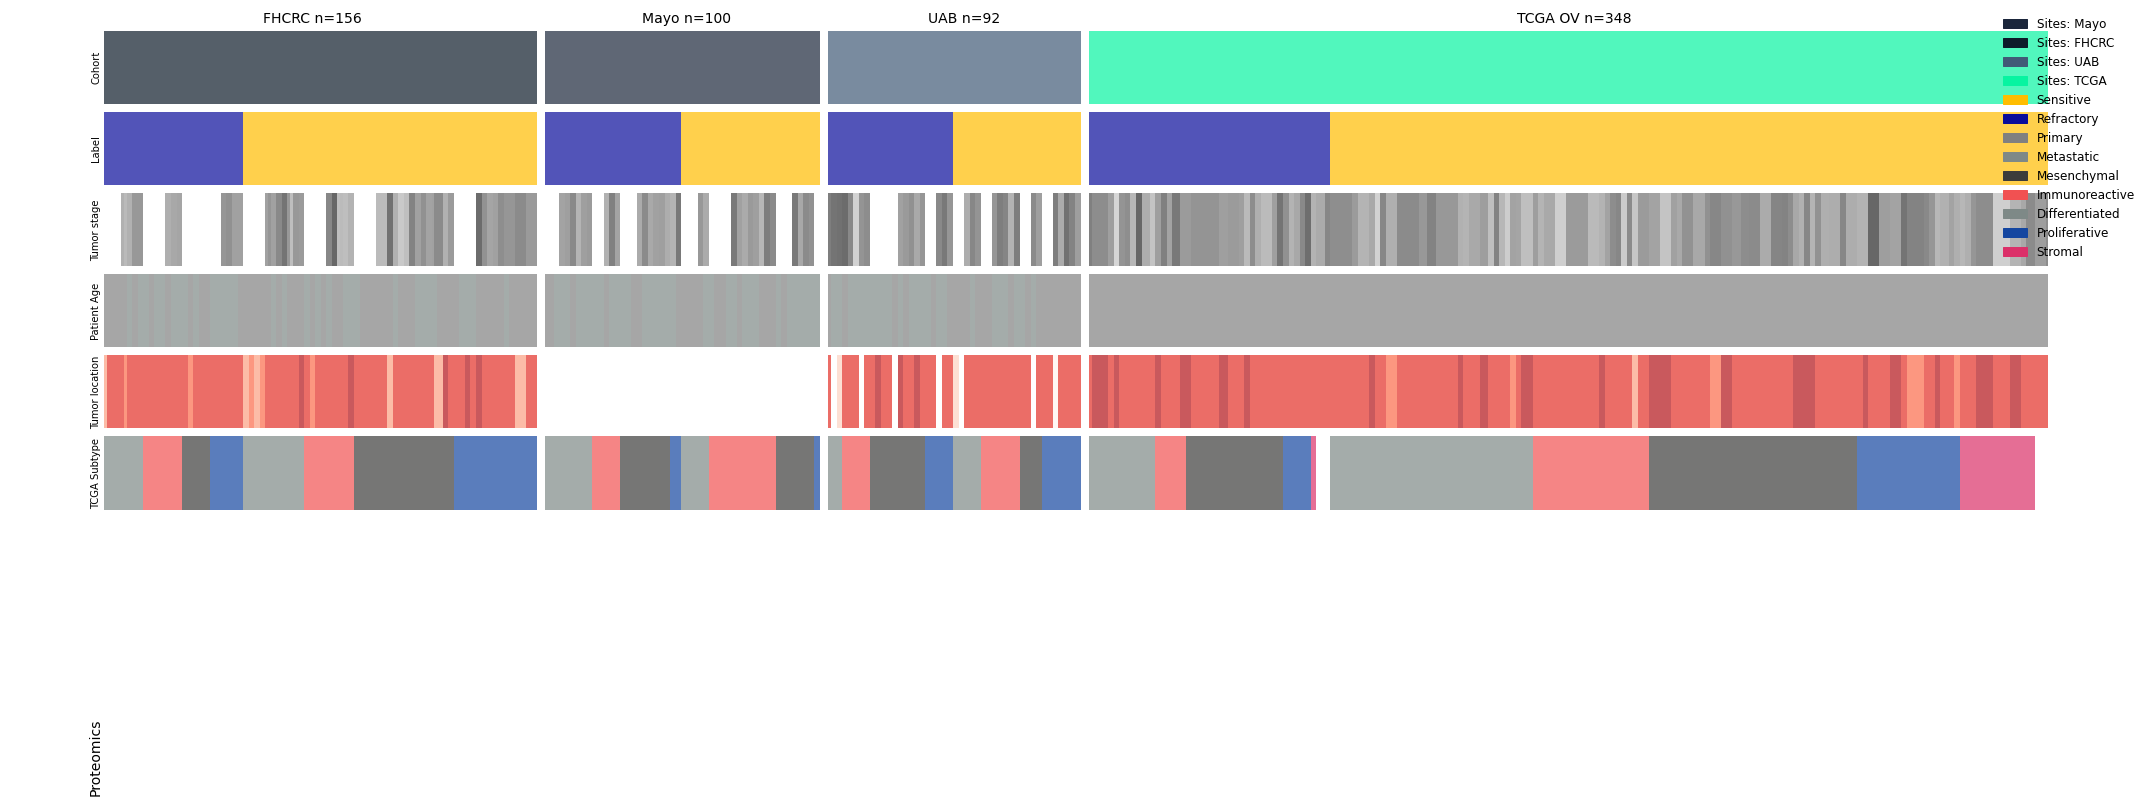

In [9]:
plt.figure(figsize=(30, 12))

# Loop through categories and patients to color the squares
responce_colors = {'Sensitive': '#FFBD00', 'Refractory': '#090C9B'}

subtype_colors = {'Mesenchymal': '#3C3C3B', 'Immunoreactive':'#F15152', 'Differentiated':'#7E8987','Proliferative':'#1446A0','Stromal':'#DB3069'}

type_colors = {'Primary': 'grey', 'Metastatic': '#7E8987'}

site_colors = {'Mayo':'#1B263B', 'FHCRC':'#0D1B2A','UAB':'#415A77','TCGA':'#07F4A1'}


# custom_colors = ['#EAC435','#345995',]

#03CEA4
#FB4D3D
#32021F
#F15BB5
#00F5D4


stage_colors = {
    'IA': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IB': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IC': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IIA': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIB': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIC': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIIA': (0.9882352941176471, 0.6261437908496732, 0.5084967320261438, 1.0),
    'IIIB': (0.9843752402921953, 0.4181468665897732, 0.2926566705113418, 1.0),
    'IIIC': (0.8901960784313725, 0.18562091503267975, 0.15294117647058825, 1.0),
    'IV': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0),
    'IVA': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0),
    'IVB': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0)

}

color_list = [site_colors,responce_colors,'continuous',type_colors,stage_colors,subtype_colors]

# Plot the first part (not square)
gap = 0.1
for i, category in enumerate(df_transposed.index[0:6]):
    for j in range(len(df_transposed.columns)):
        if not pd.isna(df_transposed.loc[category, j]):
            colors = color_list[i]
            if colors == 'continuous':
                color = get_color(df_transposed.loc[category, j])
            else:
                color = colors[df_transposed.loc[category, j]]
            plt.fill_between([j, j+1], i + gap/2, i + 1 - gap/2, color=color, edgecolor=None, alpha=0.7)



# Add a horizontal gap
horizontal_gap = 1  # Adjust the size of the gap as needed
# Plot the square part (with adjusted offset)
square_height = 0.1  # Adjust as needed based on your plot's aspect ratio
offset = 6 + horizontal_gap  # Increase offset by the gap size
for i, category in enumerate(df_transposed.index[offset:]):
    for j in range(len(df_transposed.columns)):
        if not pd.isna(df_transposed.loc[category, j]):
            proteomic_value = df_transposed.loc[category, j]
            color = plt.cm.coolwarm(proteomic_value)
            plt.fill_between([j, j+1], i * square_height + offset, (i + 1) * square_height + offset, color=color, edgecolor='white', alpha=0.5)


# Set the category labels on the y-axis
# plt.yticks(np.arange(0.5, len(df.columns[:6])), df.columns[:6])  # Exclude the 'Response' column
# ax = plt.gca()
# ax.set_yticklabels(ax.get_yticklabels(), va='center', rotation=0)

# Customize the axes
plt.gca().set_aspect('auto')  # Set the aspect of the plot to 'auto'
plt.gca().invert_yaxis()  # Invert the y-axis

# Remove the x-ticks, x-tick labels, and the x-axis
plt.tick_params(axis='x',          # Changes apply to the x-axis
                which='both',      # Both major and minor ticks are affected
                bottom=False,      # Ticks along the bottom edge are off
                top=False,         # Ticks along the top edge are off
                labelbottom=False) # Labels along the bottom edge are off

plt.tick_params(axis='y',          # Changes apply to the x-axis
                which='both',      # Both major and minor ticks are affected
                bottom=False,      # Ticks along the bottom edge are off
                top=False,         # Ticks along the top edge are off
                labelbottom=False,
                labelleft=False,
                left=False) # Labels along the bottom edge are off

# Hide the spine for the top and right axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(False)    # Hide left spine

site_patches = [mpatches.Rectangle((0, 0), 1, 0.2, color=color, label=f"Sites: {label}") for label, color in site_colors.items()]
responce_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in responce_colors.items()]
type_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in type_colors.items()]
subtype_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in subtype_colors.items()]
subtype_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in subtype_colors.items()] # make colorbar


# legend1 = plt.legend(handles=site_patches, title="Sites", bbox_to_anchor=(0.2, 0), loc='upper left',frameon=False,fontsize=12)
# legend2 = plt.legend(handles=responce_patches, title="Responce", bbox_to_anchor=(0.3,0), loc='lower left',frameon=False,fontsize=12)
# legend3 = plt.legend(handles=type_patches, title="Tissue type", bbox_to_anchor=(0.4, 0), loc='lower left',frameon=False,fontsize=12)
# legend4 = plt.legend(handles=subtype_patches, title="TCGA Subtype", bbox_to_anchor=(0.5,0), loc='lower left',frameon=False,fontsize=12)
# legend5 = plt.legend(handles=responce_patches, title="Age", bbox_to_anchor=(0.6,0), loc='lower left',frameon=False,fontsize=12)
# legend1.get_title().set_fontweight('bold')
# legend2.get_title().set_fontweight('bold')
# legend3.get_title().set_fontweight('bold')
# legend4.get_title().set_fontweight('bold')
# legend5.get_title().set_fontweight('bold')

# # Add the legends to the plot
# plt.gca().add_artist(legend1)
# plt.gca().add_artist(legend2)
# plt.gca().add_artist(legend3)
# plt.gca().add_artist(legend4)
# plt.gca().add_artist(legend5)


combined_patches = site_patches + responce_patches + type_patches + subtype_patches
plt.legend(handles=combined_patches, loc='best', frameon=False, fontsize=12)





plt.text(x=75, y=-0.1, s="FHCRC n=156", fontsize=14, ha='center', va='center')
plt.text(x=210, y=-0.1, s="Mayo n=100", fontsize=14, ha='center', va='center')
plt.text(x=310, y=-0.1, s="UAB n=92", fontsize=14, ha='center', va='center')
plt.text(x=530, y=-0.1, s="TCGA OV n=348", fontsize=14, ha='center', va='center')


plt.text(x=-3, y=9, s="Proteomics", fontsize=14, ha='center', va='center',rotation=90)


plt.text(x=-3, y=0.5, s="Cohort", fontsize=10, ha='center', va='center',rotation=90)
plt.text(x=-3, y=1.5, s="Label", fontsize=10, ha='center', va='center',rotation=90)
plt.text(x=-3, y=2.5, s="Tumor stage", fontsize=10, ha='center', va='center',rotation=90)
plt.text(x=-3, y=3.5, s="Patient Age", fontsize=10, ha='center', va='center',rotation=90)
plt.text(x=-3, y=4.5, s="Tumor location", fontsize=10, ha='center', va='center',rotation=90)
plt.text(x=-3, y=5.5, s="TCGA Subtype", fontsize=10, ha='center', va='center',rotation=90)


# colorbar for age. 
# plt.text(x=530, y=-0.5, s="TCGA OV n=348", fontsize=14, ha='center', va='center')

# sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# plt.colorbar(sm, orientation='vertical')
# plt.suptitle("High grade serious ovarian cancer $H&E$-MS pair cohort overview",fontsize=15, y=0.98)
plt.tight_layout()

plt.savefig("../../figures/data_fig.png", facecolor='white', dpi=300)
plt.show()
